In [613]:
import pandas as pd
import numpy as np

In [614]:
main_dataframe = pd.read_csv('dataset_2_one_hot.csv')
print(main_dataframe)

       memberID  Age   Race  Exercise   Education  BMI            BP
0         59098   40  White  moderate  Highschool   24    91/89 mmHg
1         71908   54  Asian      none    Bachelor   27  129/111 mmHg
2         89507   91  Other      none  Highschool   17  135/114 mmHg
3         51119   83  White  moderate         PhD   20    97/99 mmHg
4         77042   71  Other      none         NaN   27   111/82 mmHg
...         ...  ...    ...       ...         ...  ...           ...
49995     37605   34  Asian  moderate         PhD   38   116/69 mmHg
49996     47391   30  Black   extreme     Masters   24   153/75 mmHg
49997     39294   79  Asian      none    Bachelor   33   163/72 mmHg
49998     46241   82  Other      none    Bachelor   33   144/93 mmHg
49999     33138   47  Black  moderate  Highschool   31   150/71 mmHg

[50000 rows x 7 columns]


In [615]:
main_dataframe.dtypes

memberID      int64
Age           int64
Race         object
Exercise     object
Education    object
BMI           int64
BP           object
dtype: object

# ** Cleaning dataset: removing Nulls **

In [616]:
main_dataframe.shape

(50000, 7)

In [617]:
print("dropping null values")
print("original shape", main_dataframe.shape)
main_dataframe = main_dataframe.dropna()
print("new shape", main_dataframe.shape)


dropping null values
original shape (50000, 7)
new shape (39917, 7)


In [618]:
print("dropping duplicates")
print("original shape", main_dataframe.shape)
main_dataframe= main_dataframe.drop_duplicates()
print("new shape", main_dataframe.shape)


dropping duplicates
original shape (39917, 7)
new shape (39119, 7)


In [619]:
print(main_dataframe.head(15))

print(main_dataframe.dtypes)

    memberID  Age      Race  Exercise   Education  BMI            BP
0      59098   40     White  moderate  Highschool   24    91/89 mmHg
1      71908   54     Asian      none    Bachelor   27  129/111 mmHg
2      89507   91     Other      none  Highschool   17  135/114 mmHg
3      51119   83     White  moderate         PhD   20    97/99 mmHg
5      35444   99  Hispanic      mild    Bachelor   37   119/75 mmHg
7      74547   25     White      none  Highschool   32  148/106 mmHg
8      19830   74     Other      mild     Masters   36  156/117 mmHg
9      49802   50     White   extreme  Highschool   25   165/87 mmHg
10     53364   43     Black   extreme  Highschool   34  128/105 mmHg
11     77364   77     White   extreme  Highschool   15   148/61 mmHg
12     74237   77     Other  moderate  Highschool   25   159/90 mmHg
13     87182   78     Asian      mild         PhD   40  148/108 mmHg
14     29079   74     Asian   extreme         PhD   37   98/104 mmHg
15     37703   64     Other      m

# removing the string from the blood pressure column

In [620]:
#initial test assigned to  a test variable (bp_for_analysis) to make sure the process works 

bp_for_analysis =  main_dataframe['BP'].replace({'mmHg':''}, regex=True)
print(bp_for_analysis)

bp_for_analysis = bp_for_analysis.str.split('/',  expand = True)
print("after split \n", bp_for_analysis)
bp_for_analysis['Systolic'] = bp_for_analysis[0]
bp_for_analysis['Diastolic'] = bp_for_analysis[1]
print(bp_for_analysis['Systolic'])

print(bp_for_analysis['Diastolic'])

bp_for_analysis = bp_for_analysis.drop(columns=[0 ,1])
#note to self, since after the split the columns are 0 and 1, the column input in .drop function expects an integer, not a string "0"

0          91/89 
1        129/111 
2        135/114 
3          97/99 
5         119/75 
           ...   
49995     116/69 
49996     153/75 
49997     163/72 
49998     144/93 
49999     150/71 
Name: BP, Length: 39119, dtype: object
after split 
          0     1
0       91   89 
1      129  111 
2      135  114 
3       97   99 
5      119   75 
...    ...   ...
49995  116   69 
49996  153   75 
49997  163   72 
49998  144   93 
49999  150   71 

[39119 rows x 2 columns]
0         91
1        129
2        135
3         97
5        119
        ... 
49995    116
49996    153
49997    163
49998    144
49999    150
Name: Systolic, Length: 39119, dtype: object
0         89 
1        111 
2        114 
3         99 
5         75 
         ... 
49995     69 
49996     75 
49997     72 
49998     93 
49999     71 
Name: Diastolic, Length: 39119, dtype: object


In [621]:
main_dataframe = main_dataframe.join(bp_for_analysis)
main_dataframe = main_dataframe.drop(columns=['BP'])
print(main_dataframe)
main_dataframe.head(20)

       memberID  Age      Race  Exercise   Education  BMI Systolic Diastolic
0         59098   40     White  moderate  Highschool   24       91       89 
1         71908   54     Asian      none    Bachelor   27      129      111 
2         89507   91     Other      none  Highschool   17      135      114 
3         51119   83     White  moderate         PhD   20       97       99 
5         35444   99  Hispanic      mild    Bachelor   37      119       75 
...         ...  ...       ...       ...         ...  ...      ...       ...
49995     37605   34     Asian  moderate         PhD   38      116       69 
49996     47391   30     Black   extreme     Masters   24      153       75 
49997     39294   79     Asian      none    Bachelor   33      163       72 
49998     46241   82     Other      none    Bachelor   33      144       93 
49999     33138   47     Black  moderate  Highschool   31      150       71 

[39119 rows x 8 columns]


,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic
0,59098,40,White,moderate,Highschool,24,91,89
1,71908,54,Asian,none,Bachelor,27,129,111
2,89507,91,Other,none,Highschool,17,135,114
3,51119,83,White,moderate,PhD,20,97,99
5,35444,99,Hispanic,mild,Bachelor,37,119,75
7,74547,25,White,none,Highschool,32,148,106
8,19830,74,Other,mild,Masters,36,156,117
9,49802,50,White,extreme,Highschool,25,165,87
10,53364,43,Black,extreme,Highschool,34,128,105
11,77364,77,White,extreme,Highschool,15,148,61


# Analyzing age with descriptive statistics

creating the age_group & BMI_group for one hot encoding


In [622]:
def  age_group(age):
    if pd.isna(age):
        return np.nan
    elif age < 18:
        return 1
    elif age <= 35:
        return 2
    elif age <= 55:
        return 3
    elif age <= 70:
        return 4
    else:
        return 5

main_dataframe['age_group'] = main_dataframe['Age'].apply(age_group)
print("Created 'age_group' variable")
print(main_dataframe['age_group'].value_counts().sort_index())
main_dataframe.head(20)

Created 'age_group' variable
age_group
1       10
2     8671
3     9406
4     7099
5    13933
Name: count, dtype: int64


,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic,age_group
0,59098,40,White,moderate,Highschool,24,91,89,3
1,71908,54,Asian,none,Bachelor,27,129,111,3
2,89507,91,Other,none,Highschool,17,135,114,5
3,51119,83,White,moderate,PhD,20,97,99,5
5,35444,99,Hispanic,mild,Bachelor,37,119,75,5
7,74547,25,White,none,Highschool,32,148,106,2
8,19830,74,Other,mild,Masters,36,156,117,5
9,49802,50,White,extreme,Highschool,25,165,87,3
10,53364,43,Black,extreme,Highschool,34,128,105,3
11,77364,77,White,extreme,Highschool,15,148,61,5


In [623]:
def  BMI_group(BMI):
    if pd.isna(BMI):
        return np.nan
    elif BMI < 18.5:
        return 1
    elif BMI <= 24.9:
        return 2
    elif BMI <= 29.9:
        return 3
    elif BMI <= 34.9:
        return 4
    elif BMI <= 39.9:
        return 5
    else:
        return 6

main_dataframe['BMI_group'] = main_dataframe['BMI'].apply(BMI_group)
print("Created 'BMI_group' variable")
print(main_dataframe['BMI_group'].value_counts().sort_index())
main_dataframe.head(20)

Created 'BMI_group' variable
BMI_group
1    6041
2    9023
3    7434
4    7583
5    7509
6    1529
Name: count, dtype: int64


,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic,age_group,BMI_group
0,59098,40,White,moderate,Highschool,24,91,89,3,2
1,71908,54,Asian,none,Bachelor,27,129,111,3,3
2,89507,91,Other,none,Highschool,17,135,114,5,1
3,51119,83,White,moderate,PhD,20,97,99,5,2
5,35444,99,Hispanic,mild,Bachelor,37,119,75,5,5
7,74547,25,White,none,Highschool,32,148,106,2,4
8,19830,74,Other,mild,Masters,36,156,117,5,5
9,49802,50,White,extreme,Highschool,25,165,87,3,3
10,53364,43,Black,extreme,Highschool,34,128,105,3,4
11,77364,77,White,extreme,Highschool,15,148,61,5,1


In [624]:
main_dataframe['Diastolic'].dtype
main_dataframe['Diastolic'] = main_dataframe['Diastolic'].astype(int)
main_dataframe['Systolic'] = main_dataframe['Systolic'].astype(int)


In [625]:
def BP_group(Systolic, Diastolic):
    if pd.isna(Systolic) or pd.isna(Diastolic):
        return np.nan
    elif Systolic < 120 and Diastolic < 80:
        return 'Normal'
    elif Systolic < 130 and Diastolic < 80:
        return 'Elevated'
    elif (Systolic >= 130 and Systolic < 140) or (Diastolic >= 80 and Diastolic < 90):
        return 'High Blood Pressure Stage 1'
    elif Systolic >= 140 or Diastolic >= 90:
        return 'High Blood Pressure Stage 2'
    elif Systolic > 180 or Diastolic >= 120:
        return 'Emergency'
    else:
        return 'Error or Emergency'

# Apply the function to each row
main_dataframe['BP_Group'] = main_dataframe.apply(
    lambda row: BP_group(row['Systolic'], row['Diastolic']), 
    axis=1
)

print("Created 'BP_Group' variable")
print(main_dataframe['BP_Group'].value_counts().sort_index())
main_dataframe.head(20)
     

Created 'BP_Group' variable
BP_Group
Elevated                        1455
High Blood Pressure Stage 1     9931
High Blood Pressure Stage 2    23535
Normal                          4198
Name: count, dtype: int64


,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic,age_group,BMI_group,BP_Group
0,59098,40,White,moderate,Highschool,24,91,89,3,2,High Blood Pressure Stage 1
1,71908,54,Asian,none,Bachelor,27,129,111,3,3,High Blood Pressure Stage 2
2,89507,91,Other,none,Highschool,17,135,114,5,1,High Blood Pressure Stage 1
3,51119,83,White,moderate,PhD,20,97,99,5,2,High Blood Pressure Stage 2
5,35444,99,Hispanic,mild,Bachelor,37,119,75,5,5,Normal
7,74547,25,White,none,Highschool,32,148,106,2,4,High Blood Pressure Stage 2
8,19830,74,Other,mild,Masters,36,156,117,5,5,High Blood Pressure Stage 2
9,49802,50,White,extreme,Highschool,25,165,87,3,3,High Blood Pressure Stage 1
10,53364,43,Black,extreme,Highschool,34,128,105,3,4,High Blood Pressure Stage 2
11,77364,77,White,extreme,Highschool,15,148,61,5,1,High Blood Pressure Stage 2


# removing outliers

reference used: https://www.geeksforgeeks.org/pandas/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

Using DataFrame.drop() with Conditional Index

In [626]:
print("before removing outliers \n", main_dataframe['Age'].describe())

main_dataframe['Age'].value_counts

print(main_dataframe['Age'].unique())
#looking at the unique values we see people who are 123, 132, and 212 which is impossible. 
# for the sake of descriptive accuracy I am only going to keep maybe 113 114 because it is rare but not impossible.

print("original shape", main_dataframe.shape)
values_to_drop= main_dataframe[ main_dataframe.Age >= 105].index
main_dataframe.drop(values_to_drop, inplace=True)
print("new shape", main_dataframe.shape)


before removing outliers 
 count    39119.000000
mean        58.508755
std         23.803981
min          1.000000
25%         38.000000
50%         59.000000
75%         79.000000
max        212.000000
Name: Age, dtype: float64
[ 40  54  91  83  99  25  74  50  43  77  78  64  72   1  97  37  85  34
  71  39   2  65  62  96  20  21  70  88  45  55  42  75  49  28  98  61
  92  95  38  36 132  51  52  57  86  31 123  73  41  32  47  79  82  63
  59  30  19  26  27  44 154  81  35  66  87  90  46  22  60  89  18  80
  23  68  94  33  67  48  24  84  76  29  58  56  93  53  69 113 114   3
 143 122   5   4 134 212]
original shape (39119, 11)
new shape (39109, 11)


In [627]:
print(main_dataframe)
main_dataframe.head(3)
print("range of ages after cleaning", main_dataframe['Age'].unique())


print("after removing outliers\n", main_dataframe['Age'].describe())

       memberID  Age      Race  Exercise   Education  BMI  Systolic  \
0         59098   40     White  moderate  Highschool   24        91   
1         71908   54     Asian      none    Bachelor   27       129   
2         89507   91     Other      none  Highschool   17       135   
3         51119   83     White  moderate         PhD   20        97   
5         35444   99  Hispanic      mild    Bachelor   37       119   
...         ...  ...       ...       ...         ...  ...       ...   
49995     37605   34     Asian  moderate         PhD   38       116   
49996     47391   30     Black   extreme     Masters   24       153   
49997     39294   79     Asian      none    Bachelor   33       163   
49998     46241   82     Other      none    Bachelor   33       144   
49999     33138   47     Black  moderate  Highschool   31       150   

       Diastolic  age_group  BMI_group                     BP_Group  
0             89          3          2  High Blood Pressure Stage 1  
1      

# Creating the One hot encoding for the age group & BMI group

In [628]:
main_dataframe['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0        40
1        54
2        91
3        83
5        99
         ..
49995    34
49996    30
49997    79
49998    82
49999    47
Name: Age, Length: 39109, dtype: int64>

In [629]:
age_group_dummies = pd.get_dummies(main_dataframe['age_group'], prefix='age_group', dtype=int)
main_dataframe = pd.concat([main_dataframe, age_group_dummies], axis=1)
print("One-hot encoding created for age_group")
print(age_group_dummies.head())
main_dataframe.head(20)

One-hot encoding created for age_group
   age_group_1  age_group_2  age_group_3  age_group_4  age_group_5
0            0            0            1            0            0
1            0            0            1            0            0
2            0            0            0            0            1
3            0            0            0            0            1
5            0            0            0            0            1


,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic,age_group,BMI_group,BP_Group,age_group_1,age_group_2,age_group_3,age_group_4,age_group_5
0,59098,40,White,moderate,Highschool,24,91,89,3,2,High Blood Pressure Stage 1,0,0,1,0,0
1,71908,54,Asian,none,Bachelor,27,129,111,3,3,High Blood Pressure Stage 2,0,0,1,0,0
2,89507,91,Other,none,Highschool,17,135,114,5,1,High Blood Pressure Stage 1,0,0,0,0,1
3,51119,83,White,moderate,PhD,20,97,99,5,2,High Blood Pressure Stage 2,0,0,0,0,1
5,35444,99,Hispanic,mild,Bachelor,37,119,75,5,5,Normal,0,0,0,0,1
7,74547,25,White,none,Highschool,32,148,106,2,4,High Blood Pressure Stage 2,0,1,0,0,0
8,19830,74,Other,mild,Masters,36,156,117,5,5,High Blood Pressure Stage 2,0,0,0,0,1
9,49802,50,White,extreme,Highschool,25,165,87,3,3,High Blood Pressure Stage 1,0,0,1,0,0
10,53364,43,Black,extreme,Highschool,34,128,105,3,4,High Blood Pressure Stage 2,0,0,1,0,0
11,77364,77,White,extreme,Highschool,15,148,61,5,1,High Blood Pressure Stage 2,0,0,0,0,1


looking at the dtypes and the unique values to check that encoding will properly work, using the replacement method for strings encoding into a numerical format.

In [630]:
main_dataframe['Race'].dtypes
main_dataframe['Race'].unique()

array(['White', 'Asian', 'Other', 'Hispanic', 'Black'], dtype=object)

Race conversion : White -> 0, Black-> 1, Other -> 2, Hispanic->4, Asian->5 
Race
1    7985
2    7870
4    7802
0    7730
5    7722
Name: count, dtype: int64


/var/folders/v6/6xj5cyl17hg_3lpjs71rf6jr0000gn/T/ipykernel_3438/3872825958.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_dataframe['Race'] = main_dataframe['Race'].replace({'White': 0, 'Black': 1,'Other': 2, 'Hispanic':4, 'Asian':5,  })


<Axes: ylabel='count'>

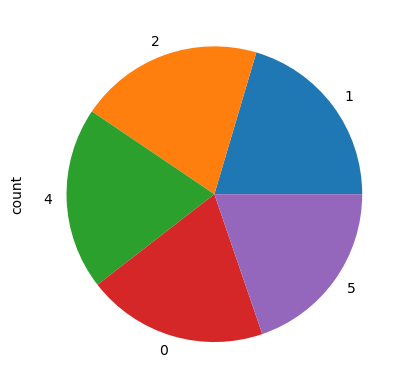

In [631]:
main_dataframe['Race'] = main_dataframe['Race'].replace({'White': 0, 'Black': 1,'Other': 2, 'Hispanic':4, 'Asian':5,  })
print("Race conversion : White -> 0, Black-> 1, Other -> 2, Hispanic->4, Asian->5 ")
print(main_dataframe['Race'].value_counts())


main_dataframe['Race'].value_counts().plot(kind='pie')

In [632]:
main_dataframe['Education'].unique()

array(['Highschool', 'Bachelor', 'PhD', 'Masters'], dtype=object)

Education conversion: Highschool -> 0, Bachelor-> 1, Phd -> 2, Masters->3, 
Education
3    9909
0    9815
1    9756
2    9629
Name: count, dtype: int64


/var/folders/v6/6xj5cyl17hg_3lpjs71rf6jr0000gn/T/ipykernel_3438/1403706021.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_dataframe['Education'] = main_dataframe['Education'].replace({'Highschool': 0, 'Bachelor': 1,'PhD': 2, 'Masters':3,   })


<Axes: ylabel='count'>

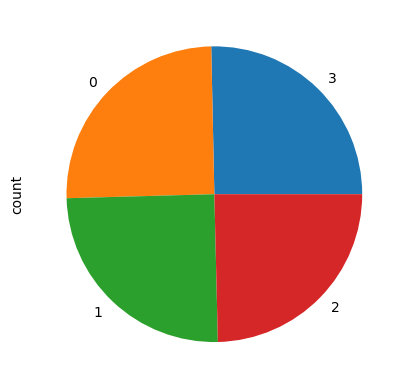

In [633]:
main_dataframe['Education'] = main_dataframe['Education'].replace({'Highschool': 0, 'Bachelor': 1,'PhD': 2, 'Masters':3,   })
print("Education conversion: Highschool -> 0, Bachelor-> 1, Phd -> 2, Masters->3, ")
print(main_dataframe['Education'].value_counts())


main_dataframe['Education'].value_counts().plot(kind='pie')

Exercise conversion: none-> 0, moderate-> 1, mild -> 2, extreme->3, 
Exercise
1    9891
2    9798
3    9755
0    9665
Name: count, dtype: int64


/var/folders/v6/6xj5cyl17hg_3lpjs71rf6jr0000gn/T/ipykernel_3438/2142689480.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_dataframe['Exercise'] = main_dataframe['Exercise'].replace({'none': 0, 'moderate': 1,'mild': 2, 'extreme':3,   })


<Axes: ylabel='count'>

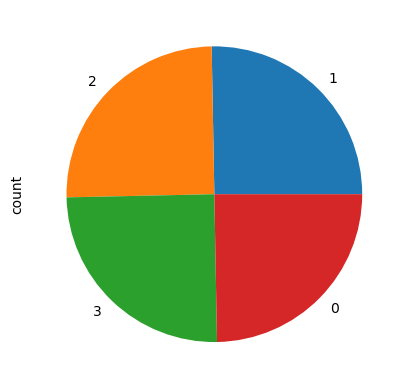

In [634]:
main_dataframe['Exercise'].unique()

main_dataframe['Exercise'] = main_dataframe['Exercise'].replace({'none': 0, 'moderate': 1,'mild': 2, 'extreme':3,   })
print("Exercise conversion: none-> 0, moderate-> 1, mild -> 2, extreme->3, ")
print(main_dataframe['Exercise'].value_counts())


main_dataframe['Exercise'].value_counts().plot(kind='pie')

In [635]:
BMI_group_dummies = pd.get_dummies(main_dataframe['BMI_group'], prefix='BMI_group', dtype=int)
main_dataframe = pd.concat([main_dataframe, BMI_group_dummies], axis=1)
print("One-hot encoding created for BMI_group")
print(age_group_dummies.head())
main_dataframe.head(20)

One-hot encoding created for BMI_group
   age_group_1  age_group_2  age_group_3  age_group_4  age_group_5
0            0            0            1            0            0
1            0            0            1            0            0
2            0            0            0            0            1
3            0            0            0            0            1
5            0            0            0            0            1


,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic,age_group,BMI_group,...,age_group_2,age_group_3,age_group_4,age_group_5,BMI_group_1,BMI_group_2,BMI_group_3,BMI_group_4,BMI_group_5,BMI_group_6
0,59098,40,0,1,0,24,91,89,3,2,...,0,1,0,0,0,1,0,0,0,0
1,71908,54,5,0,1,27,129,111,3,3,...,0,1,0,0,0,0,1,0,0,0
2,89507,91,2,0,0,17,135,114,5,1,...,0,0,0,1,1,0,0,0,0,0
3,51119,83,0,1,2,20,97,99,5,2,...,0,0,0,1,0,1,0,0,0,0
5,35444,99,4,2,1,37,119,75,5,5,...,0,0,0,1,0,0,0,0,1,0
7,74547,25,0,0,0,32,148,106,2,4,...,1,0,0,0,0,0,0,1,0,0
8,19830,74,2,2,3,36,156,117,5,5,...,0,0,0,1,0,0,0,0,1,0
9,49802,50,0,3,0,25,165,87,3,3,...,0,1,0,0,0,0,1,0,0,0
10,53364,43,1,3,0,34,128,105,3,4,...,0,1,0,0,0,0,0,1,0,0
11,77364,77,0,3,0,15,148,61,5,1,...,0,0,0,1,1,0,0,0,0,0


# Final dataframe


In [636]:
main_dataframe.head(20)

,memberID,Age,Race,Exercise,Education,BMI,Systolic,Diastolic,age_group,BMI_group,...,age_group_2,age_group_3,age_group_4,age_group_5,BMI_group_1,BMI_group_2,BMI_group_3,BMI_group_4,BMI_group_5,BMI_group_6
0,59098,40,0,1,0,24,91,89,3,2,...,0,1,0,0,0,1,0,0,0,0
1,71908,54,5,0,1,27,129,111,3,3,...,0,1,0,0,0,0,1,0,0,0
2,89507,91,2,0,0,17,135,114,5,1,...,0,0,0,1,1,0,0,0,0,0
3,51119,83,0,1,2,20,97,99,5,2,...,0,0,0,1,0,1,0,0,0,0
5,35444,99,4,2,1,37,119,75,5,5,...,0,0,0,1,0,0,0,0,1,0
7,74547,25,0,0,0,32,148,106,2,4,...,1,0,0,0,0,0,0,1,0,0
8,19830,74,2,2,3,36,156,117,5,5,...,0,0,0,1,0,0,0,0,1,0
9,49802,50,0,3,0,25,165,87,3,3,...,0,1,0,0,0,0,1,0,0,0
10,53364,43,1,3,0,34,128,105,3,4,...,0,1,0,0,0,0,0,1,0,0
11,77364,77,0,3,0,15,148,61,5,1,...,0,0,0,1,1,0,0,0,0,0
